# Name: Gourav Roy
# TASK 1: Linear Regression
## PREDICTION USING SUPERVISED ML
## Objective: To predict the percentage of a student based on the no. of study hours. What will be predicted score if a student studies for 9.25 hrs/ day?
## Simple Linear Regression
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

In [1]:
# Importing all the required libraries
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

In [2]:
# Reading data from remote link
url = "http://bit.ly/w-data"
s_data = pd.read_csv(url)
print("Data imported successfully")

Data imported successfully


In [3]:
s_data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
s_data.shape

(25, 2)

In [5]:
s_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
s_data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [7]:
s_data.isnull().sum()

Hours     0
Scores    0
dtype: int64

# Data Visualization
Let's plot our data points on 2-D graph to analyse our dataset and see if we can manually find any relationship between the data.

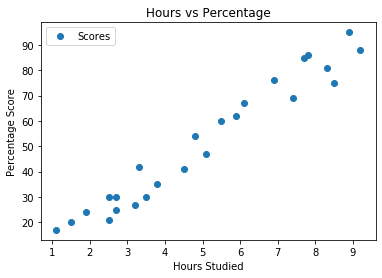

In [8]:
# Plotting the distribution of scores
s_data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

#### From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.

# Preparing the data

The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [9]:
X = s_data.iloc[:, :-1].values  
y = s_data.iloc[:, 1].values  
print("Shape of X =",X.shape)
print("Shape of y=",y.shape)

Shape of X = (25, 1)
Shape of y= (25,)


# Splitting the data
Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [10]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=0) 
print("Shape of X_train =",X_train.shape)
print("Shape of y_train =",y_train.shape)
print("Shape of X_test =",X_test.shape)
print("Shape of y_test =",y_test.shape)

Shape of X_train = (20, 1)
Shape of y_train = (20,)
Shape of X_test = (5, 1)
Shape of y_test = (5,)


# Training the Algorithm
We have split our data into training and testing sets, and now is finally the time to train our algorithm.

In [11]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.


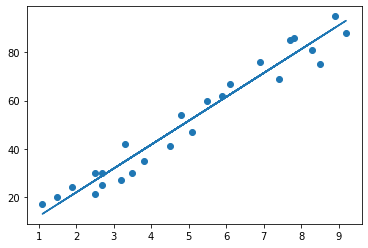

In [12]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

# Checking the accuracy for train and test set

Train set Score
0.9515510725211553


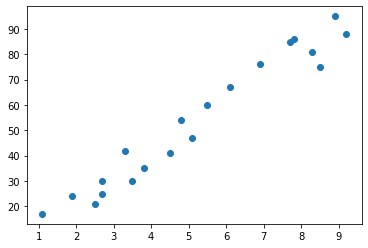

In [13]:
plt.scatter(X_train,y_train)
print("Train set Score")
print(regressor.score(X_train,y_train))

Test Score
0.9454906892105356


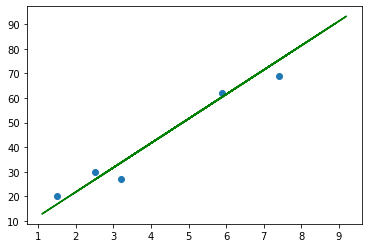

In [14]:
print("Test Score")
print(regressor.score(X_test,y_test))
plt.scatter(X_test,y_test)
plt.plot(X_train,regressor.predict(X_train),color="g")

# Making Predictions
Now that we have trained our algorithm, it's time to make some predictions. In order to compare the predictions with the already loaded data we have divided the data into train and test set.

In [15]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 

In [16]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [17]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


# Predicting the scores for 9.25 hours

In [18]:
# You can also test with your own data
hours = 9.25
own_pred = regressor.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737538


# Evaluating the model
The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [19]:
from sklearn import metrics  
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, y_pred)) 
print('R2 Score:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 4.183859899002975
R2 Score: 0.9454906892105356


# Saving the model
The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [20]:
import joblib
joblib.dump(regressor,"TASK1.pckl")

['TASK1.pckl']

In [21]:
model=joblib.load("TASK1.pckl")

## Thank You!!